In [1]:
import numpy as np
import healpy as hp 
import matplotlib.pyplot as plt

In [7]:
# Parameters
nside = 512                 # HEALPix resolution (higher = finer)
npix = hp.nside2npix(nside)  # Total number of pixels

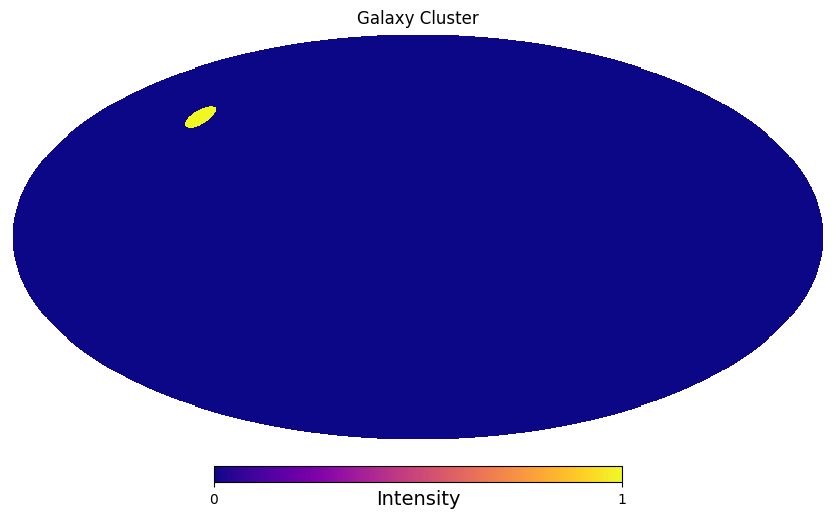

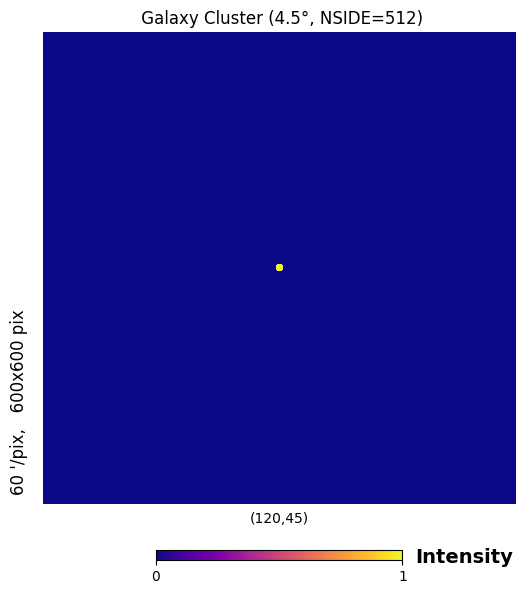

In [28]:
radius_deg = 4.5      # Angular radius of the cluster

# -------------------------------------------------------
# Derived values
sky_map = np.zeros(npix)

# Cluster center coordinates
theta_deg = 45
phi_deg = 120
theta_rad = np.radians(theta_deg)
phi_rad = np.radians(phi_deg)
vec_center = hp.ang2vec(theta_rad, phi_rad)

# Convert radius to radians
radius_rad = np.radians(radius_deg)

# Find all pixels within the circular cluster region
cluster_pixels = hp.query_disc(nside, vec_center, radius_rad, inclusive=False)

# Set those pixels to 1.0 (rest stay 0)
sky_map[:] = 0
sky_map[cluster_pixels] = 1.0

# Plot the cluster
hp.mollview(sky_map, title="Galaxy Cluster", unit="Intensity", cmap="plasma")

hp.gnomview(sky_map,
            rot=(phi_deg, 90 - theta_deg),
            xsize=600,
            reso=max(1, int(60 * 2**9 / nside)),  # adaptive resolution in arcmin/pixel
            title=f" Galaxy Cluster ({radius_deg}°, NSIDE={nside})",
            unit="Intensity",
            cmap="plasma")

# Save the output image
output_name = f"cluster_r{radius_deg}deg_nside{nside}.png"
plt.savefig(output_name)


In [29]:
#adding a gussian smoothening to it 

In [ ]:
pixels_in_disc = hp.query_disc(nside, vec_center, radius_rad)
number= hp.ang2pix(512, theta , phi)
   # print (number)
lon = np.degrees(phi)
lat = 90 - np.degrees(theta)

for pix in pixels_in_disc:
        vec = hp.pix2vec(nside, pix)  # direction of this pixel
        angle = np.arccos(np.clip(np.dot(vec, vec_center), -1, 1))
        gaussian = np.exp(-0.5 * (angle / radius_rad)**2)
        sky_map[pix] += gaussian

# Plot result
hp.mollview(sky_map, title="Galaxy Cluster with Gaussian Smoothing")
plt.show()
hp.gnomview(sky_map,
            rot=(phi_deg, 90 - theta_deg),
            xsize=600,
            reso=1,  # adaptive resolution in arcmin/pixel
            title=f" Galaxy Cluster ({radius_deg}°, NSIDE={nside})",
            unit="Intensity",
            cmap="plasma")


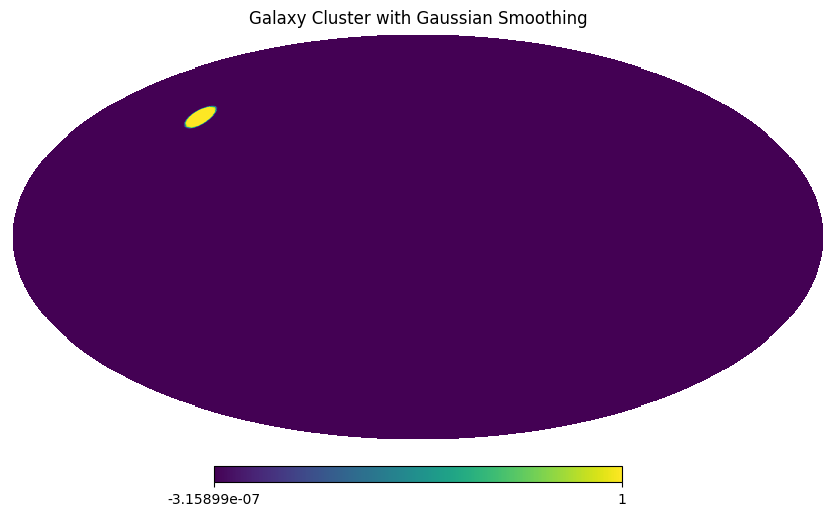

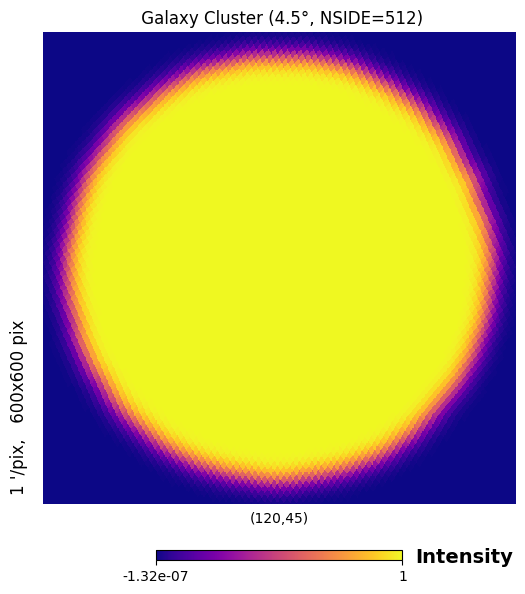

In [30]:
#or-else
sky_map_smoothed = hp.smoothing(sky_map, fwhm=np.radians(0.5))
hp.mollview(sky_map_smoothed, title="Galaxy Cluster with Gaussian Smoothing")
plt.show()
hp.gnomview(sky_map_smoothed,
            rot=(phi_deg, 90 - theta_deg),
            xsize=600,
            reso=1,  # adaptive resolution in arcmin/pixel
            title=f" Galaxy Cluster ({radius_deg}°, NSIDE={nside})",
            unit="Intensity",
            cmap="plasma")
